# EDA To Prediction (DieTanic)


### Part1: EDA(Exploratory Data Analysis)
    - 피쳐분석
    - 여러피쳐간의 관계 확인 
### Part2: Feature Engineering and Data Cleaning
    - 피쳐추가 
    - 피쳐제거
    - 모델에 맞는 피쳐로 변환 
### Part3: Predictive Modeling
    - 기본 알고리즘 
    - 교차검증 
    - 앙상블 
    - 중요피쳐들 추출

# Part1: Exploratory Data Analysis(EDA)

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data=pd.read_csv('train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.isnull().sum() #checking for total null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

The **Age, Cabin and Embarked** have null values. I will try to fix them.

### How many Survived??

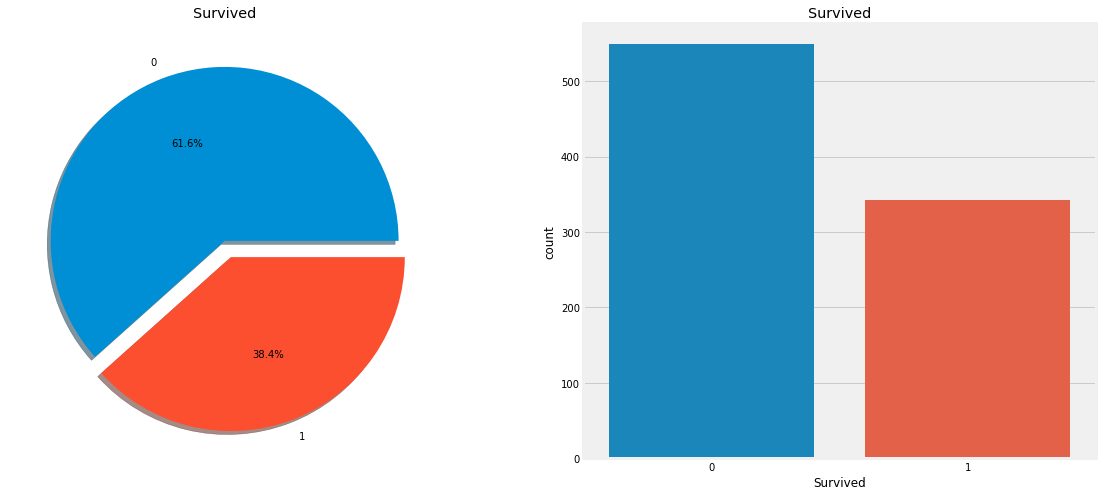

In [5]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True) 
#explode: 원점에서 튀어나온정도 autopct: 각 항목의 퍼센트 
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=data,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

In [6]:
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

### Feature 유형 

1) Categorical Features: 순서를 부여할 수 없음 
- Categorical Vaiable = Nomial Variable,명목변수
- 예시: 성별(남성/여성), Embarked

2) Ordinal Features: 순서형 feature
- 상대적인 순서, 분류를 부여할 수 있음 
- 예시: Height(Tall,Medium,Short), Pclass

3) Continuous Features: 연속형 features
- 변수의 값이 연속형.

### 1) SEX(Categorical Feature)

In [7]:
data.groupby(['Sex','Survived'])['Survived'].count().to_frame()

Survived
Sex    Survived          
female 0               81
       1              233
male   0              468
       1              109

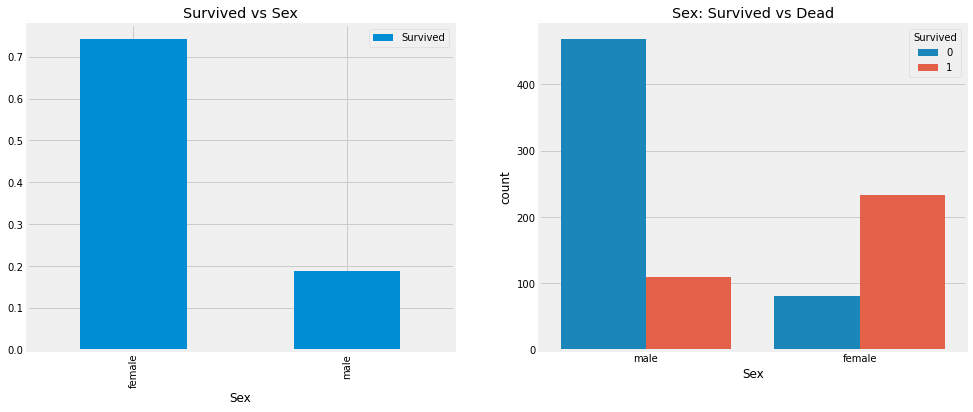

In [8]:
f, ax = plt.subplots(1,2, figsize=(15,6))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')

sns.countplot('Sex',hue='Survived',data=data, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')

plt.show()

- 남성탑승객이 여성탑승객보다 훨씬 많음. 하지만 여자 생존자가 남성 생존자의 2배가 넘음 
- 여성의 생존율은 75%인데 반해 남성의 생존율은 18%임. "성별"은 모델링에 매우 중요한 feature임.

### 2) Pclass (Ordinal Feature)

In [9]:
pd.crosstab(data.Pclass, data.Survived, margins = True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


Text(0.5, 1.0, 'Pclass: Survived vs Dead')

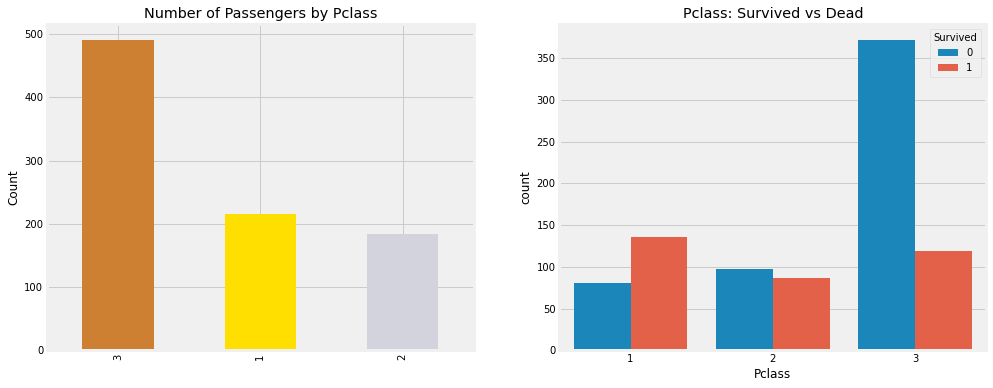

In [10]:
f, ax = plt.subplots(1,2, figsize=(15,6))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3DE'],ax=ax[0])
ax[0].set_title('Number of Passengers by Pclass')
ax[0].set_ylabel('Count')

sns.countplot('Pclass', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead')

- 3등석, 1등석 2등석 순으로 승객이 많이 탑승하였음. 
- 1등석은 생존자가 사망자보다 더 많음. 비싼 객실일수록 생존확률이 더 높음. 

In [11]:
pd.crosstab([data.Sex, data.Survived], data.Pclass, margins=True).style.background_gradient(cmap='summer_r')

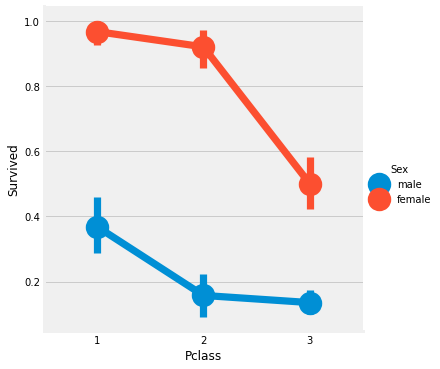

In [12]:
sns.factorplot('Pclass','Survived', hue='Sex', data=data)
plt.show()

- Pclass무관하게 여성의 생존율이 높음. 
- 높은 등급 객실일 수록 생존율이 높음. 

### 3) Age(Continuous Feature)

In [13]:
print('Oldest Passenger was of ', data['Age'].max(),'Years')
print('Youngest Passenger was of ', data['Age'].min(),'Years')
print('Average Age on the ship ', data['Age'].mean(),'Years')

Oldest Passenger was of  80.0 Years
Youngest Passenger was of  0.42 Years
Average Age on the ship  29.69911764705882 Years


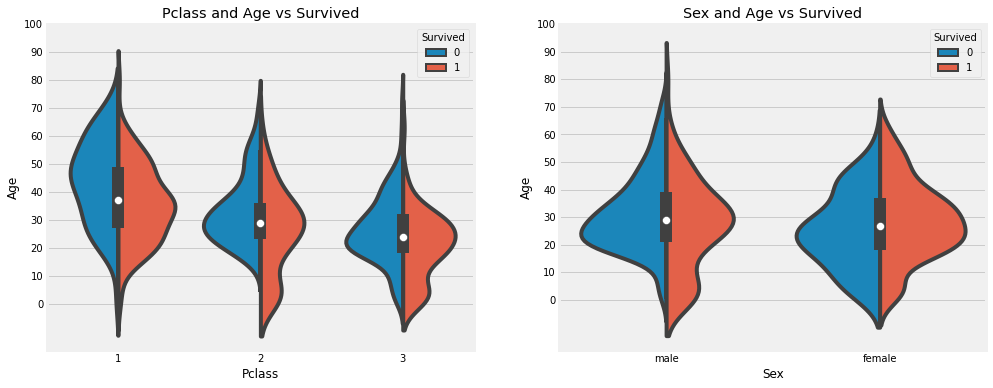

In [14]:
f, ax = plt.subplots(1,2, figsize=(15,6))
sns.violinplot('Pclass', 'Age', hue='Survived', data=data, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))

sns.violinplot('Sex','Age', hue='Survived', data=data, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))

plt.show()

- Pclass등급 낮아짐에 따라 어린아이들의 생존율이 올라감. (15세이하 구간)
- 1등석의 20-50세 생존율이 높음. 

- 남성은 10세이하 생존율높고, 60세이상에선 생존확률이 낮음. 
- 여성은 10-40세의 생존율이 높음. (10세이하 구간에서는 오히려 낮음.)

Age feature는 177개의 Null값을 가지고 있음. 
Name feature를 통해서 승객의 연령대를 유추해볼 수 있을 것으로 판단. 

In [15]:
data['Initial'] = 0 
data['Initial'] = data.Name.str.extract('([A-aZ-z]+)\.') # A-Z,a-z문자열과 그 뒤에있는 .(dot)을 찾음

In [16]:
pd.crosstab(data.Initial, data.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [17]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt', 'Sir','Don'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'], inplace=True)

In [18]:
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [19]:
# Age결측값 채우기 
# 해당 그룹의 평균값으로 결측치 채움 
data.loc[(data.Age.isnull()) & (data.Initial == 'Mr') , 'Age'] = 33
data.loc[(data.Age.isnull()) & (data.Initial == 'Mrs'), 'Age'] = 36
data.loc[(data.Age.isnull()) & (data.Initial == 'Master'), 'Age'] = 5
data.loc[(data.Age.isnull()) & (data.Initial == 'Miss'), 'Age'] = 22
data.loc[(data.Age.isnull()) & (data.Initial == 'Other'), 'Age'] = 46

In [20]:
data.Age.isnull().any()

False

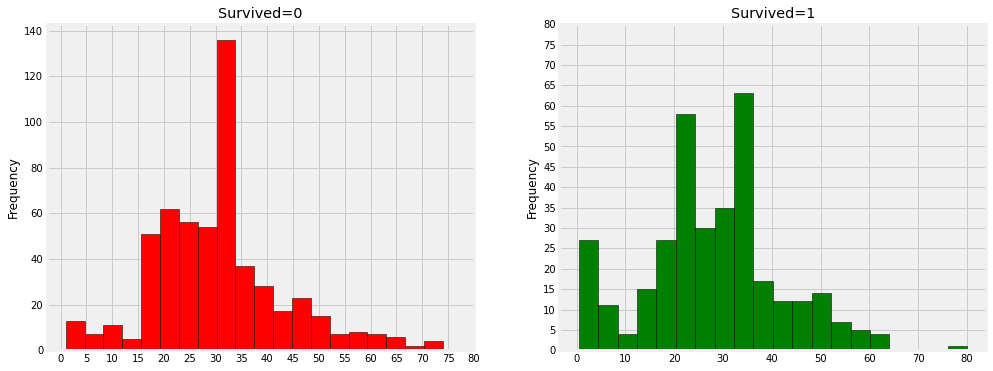

In [21]:
f, ax = plt.subplots(1,2,figsize=(15,6))
data[data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red') #bins20개씩
ax[0].set_title('Survived=0')
x1 = list(range(0,85,5))
ax[0].set_xticks(x1)

data[data['Survived']==1].Age.plot.hist(ax=ax[1],bins=20,edgecolor='black',color='green')
ax[1].set_title('Survived=1')
x2 = list(range(0,85,5))
ax[1].set_yticks(x2)

plt.show()

- 5세이하 아이들이 많이 생존 
- 30대초반에 가장 많은 사망자발생 
- 가장 나이가 많은 사람은 생존

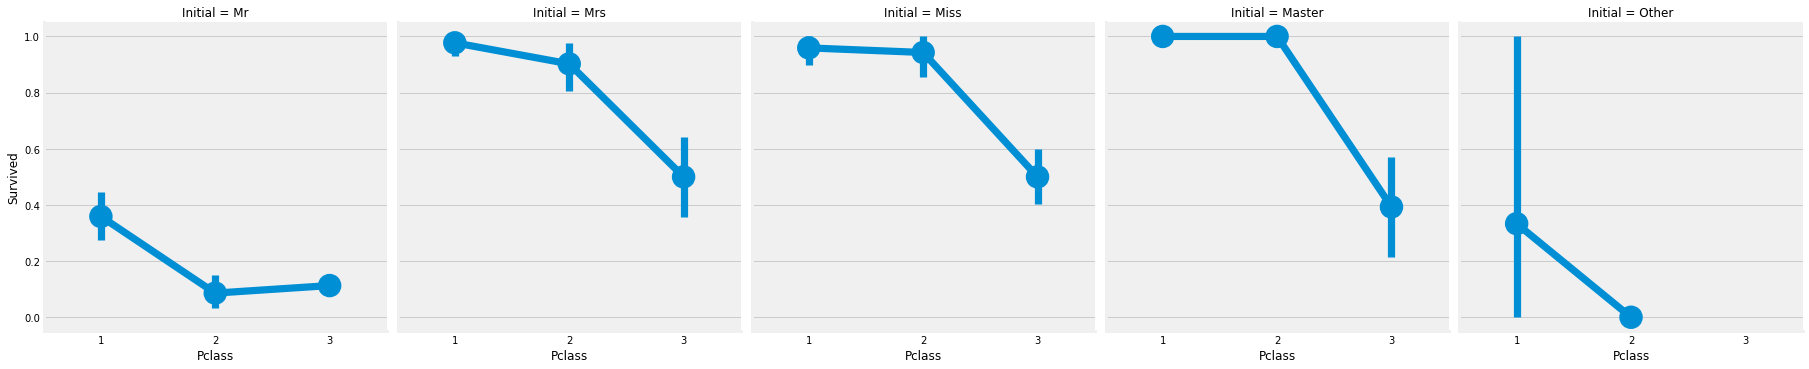

In [22]:
sns.factorplot('Pclass','Survived', col='Initial', data=data)
plt.show()

- Pclass상관없이 여성과 아이가 우선되었다는 것이 명확해 보임. 

### 4) Embarked (Categorical Value)

In [23]:
pd.crosstab([data.Embarked, data.Pclass], [data.Sex, data.Survived], margins=True).style.background_gradient(cmap='summer_r')

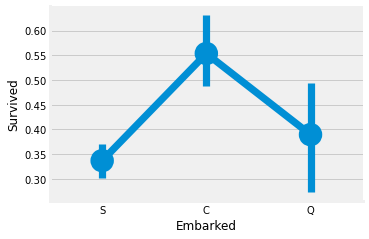

In [24]:
# 탑승항구에 따른 생존확률: C항구가 가장 높음
sns.factorplot('Embarked','Survived', data=data)
fig = plt.gcf()
fig.set_size_inches(5,3)
plt.show()

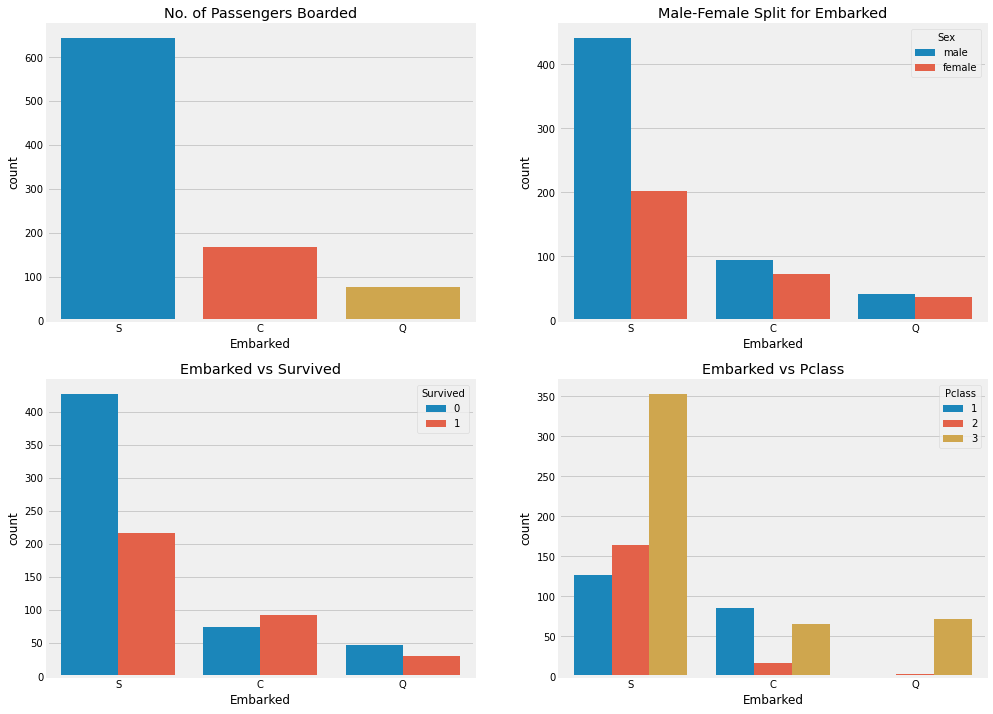

In [25]:
f, ax = plt.subplots(2, 2, figsize=(15, 12))

sns.countplot('Embarked', data=data, ax=ax[0,0])
ax[0,0].set_title('No. of Passengers Boarded')

sns.countplot('Embarked', hue='Sex', data=data, ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')

sns.countplot('Embarked', hue='Survived', data=data, ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')

sns.countplot('Embarked', hue = 'Pclass', data=data, ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.show()

- S에서 1등석 승객이 많음에도 생존율이 낮았던 이유는 3등석 승객수가 많았기 때문임. 
- C에서는 1등석 승객수가 2,3등석대비 많아서 생존율이 높게 나옴. 
- Q에서는 3등석승객이 95%정도 차지하였음. 

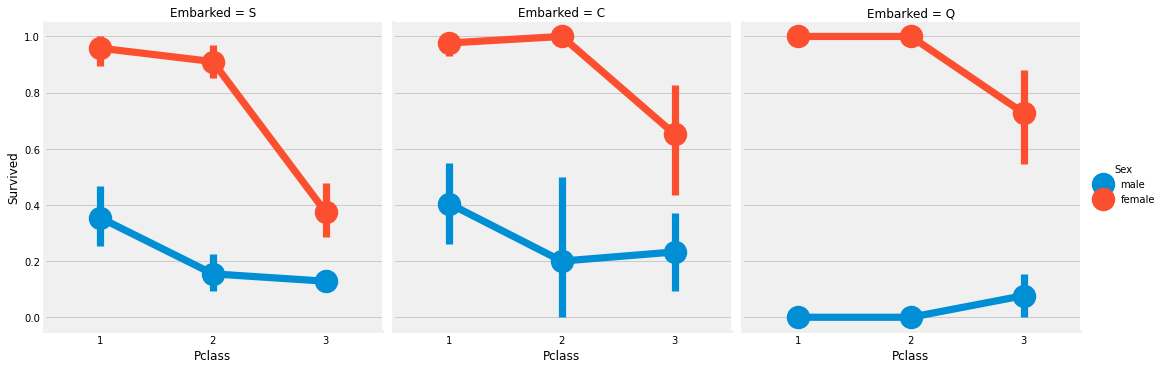

In [26]:
sns.factorplot('Pclass','Survived', hue='Sex', col='Embarked', data=data)
plt.show()

- Pclass 1,2 여성들의 생존율은 1에 가까움. 
- Q항구에서 탑승한 남성들은 생존확률이 가장 낮음. 
- 1등석남성승객은 생존율이 2,3등석 승객보다 높음(Q항구는 1등석 남성승객이 없음) 

In [27]:
# Embarked의 결측치 채우기 : 대부분의 승객이 S에서 탑승했기에 S로 채움(2개 결측치)
data['Embarked'].fillna('S',inplace=True)

In [28]:
data['Embarked'].isnull().any()

False

### 5) SibSp (Discrete Feature)
- Sibling(형제자매), Spouse(배우자)

In [29]:
pd.crosstab(data.SibSp, data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


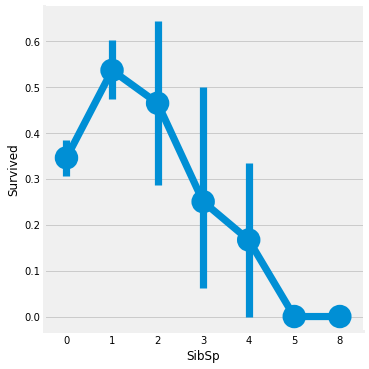

In [30]:
sns.factorplot('SibSp', 'Survived', data=data)
plt.show()

In [31]:
pd.crosstab(data.SibSp, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


- 혼자 탑승한 경우, 생존율이 34.5%임. 
- 형제자매, 배우자 수가 증가하면, 생존율은 하락한다. 
- 하지만, 5-8명인 경우 생존율이 0%인 것은 Pclass3에 속했기 때문임. 

### 6) Parch

In [32]:
pd.crosstab(data.Parch, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


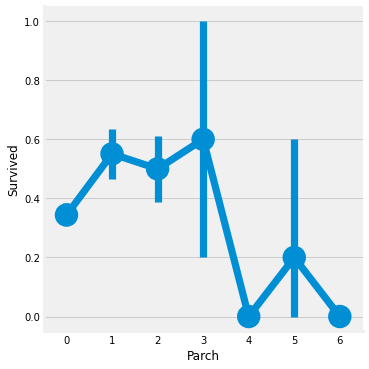

In [33]:
sns.factorplot('Parch', 'Survived', data=data, ax=ax[1])
plt.show()

- 부모나 아이와 함께 탑승한 승객의 생존확률이 높았음. 
- 하지만 그 수가 증가함에 따라서 생존율은 감소했음. 

### 7) Fare (Continuous Feature)

In [34]:
print('Highest Fare was: ', data['Fare'].max())
print('Lowest Fare was: ', data['Fare'].min()) # 가장 낮은 요금 0달러.
print('Average Fare was: ', data['Fare'].mean())

Highest Fare was:  512.3292
Lowest Fare was:  0.0
Average Fare was:  32.2042079685746


Text(0.5, 1.0, 'Fare in Pclass 3')

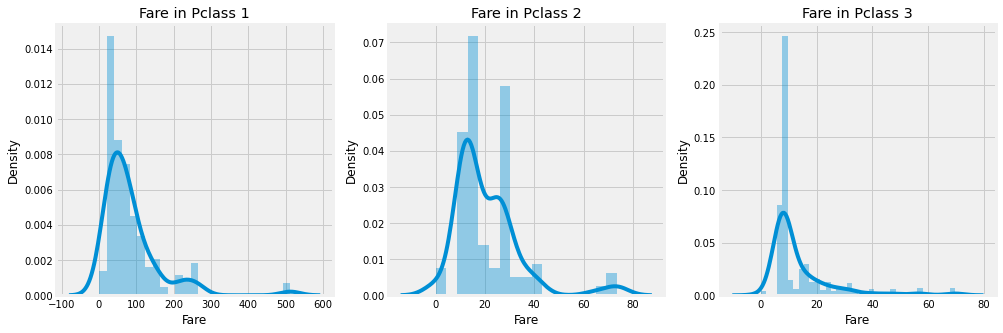

In [35]:
f, ax = plt.subplots(1,3, figsize=(15,5))

sns.distplot(data[data['Pclass']==1].Fare, ax=ax[0])
ax[0].set_title('Fare in Pclass 1')

sns.distplot(data[data['Pclass']==2].Fare, ax=ax[1])
ax[1].set_title('Fare in Pclass 2')

sns.distplot(data[data['Pclass']==3].Fare, ax=ax[2])
ax[2].set_title('Fare in Pclass 3')

## Feature의 관찰 결과 요약 
- Sex: 여성의 생존확률 높음 
- Pclass: 1등석 생존율이 높은 경향. 
- Age: 10세 이하 생존률이 높았고, 고령자의 생존확률이 낮았음. 15-35세 탑승객이 많이 사망함. 
- Embarked: C에서 탑승한 승객의 생존률이 높았음. 이는 3등석 탑승자수가 적은 것에 기인함. 
- Parch+SibSp: 1-2명 형제자매와 1-3명 직계존속과 함께 탑승한 경우가 혼자 탑승하거나 많은 가족과 탑승한 경우보다 훨씬 생존률이 높았음. 

## Correlation Between The Features

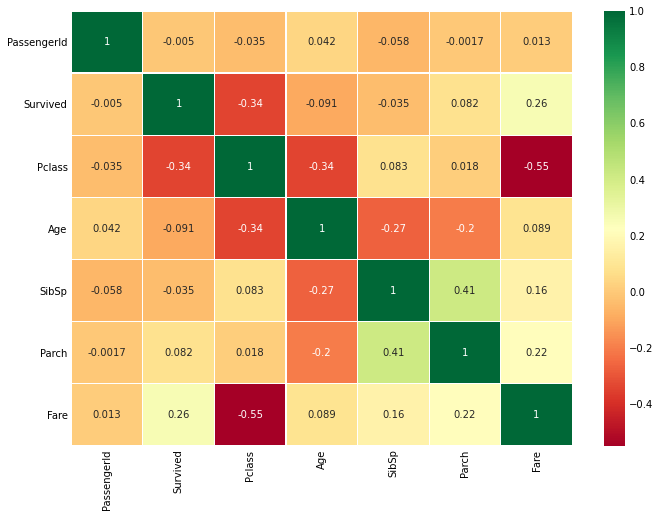

In [36]:
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn',linewidths= 0.2) 
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.show()

# Part2: Feature Engineering and Data Cleansing
- Feature Engineering: 데이터셋의 모든 Feature가 중요하지 않음. feature를 추가,제거,변환작업을 통해서 모델에 적합한 형태로 가공함. 

### Age_band
- Age는 연속피쳐임. 이를 catergory값으로 변환. 0세-80세를 5구간으로 나눔. 1구간이 16세간격임. 
- ML모델에서 연속변수를 카테고리 변수로 처리하여 입력. 

In [37]:
data['Age_band'] = 0 

data.loc[data['Age'] <= 16, 'Age_band'] = 0
data.loc[ (data['Age'] > 16) & (data['Age'] <=32), 'Age_band'] = 1
data.loc[ (data['Age'] > 32) & (data['Age'] <=48), 'Age_band'] = 2
data.loc[ (data['Age'] > 48) & (data['Age'] <=64), 'Age_band'] = 3
data.loc[ data['Age'] > 64, 'Age_band'] = 4

data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [38]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer') 

,Age_band
1,382
2,325
0,104
3,69
4,11


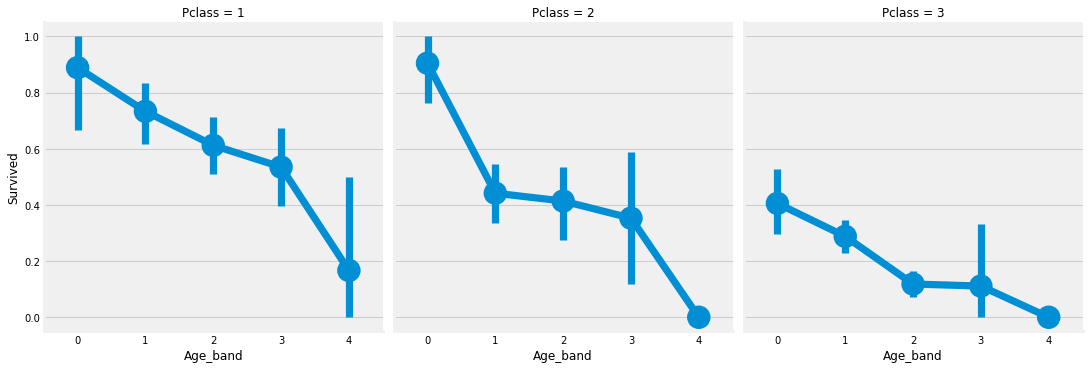

In [39]:
sns.factorplot('Age_band', 'Survived', data=data, col = 'Pclass')
plt.show()

- Pclass와 관계없이 연령이 증가할수록 생존률이 낮아진다. 

### Family_size와 Alone
- Parch와 SibSp를 이용해서 가족수 데이터를 만듬. 
- Alone은 승객이 혼자인지 아닌지를 나타냄. 

In [40]:
data['Family_Size'] = 0 
data['Family_Size'] = data['Parch'] + data['SibSp'] # Family_Size 
data['Alone'] = 0
data.loc [data.Family_Size ==0, 'Alone'] = 1 # Alone

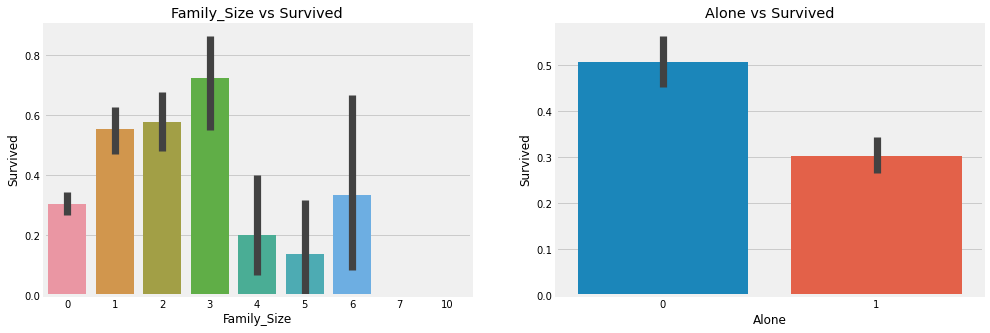

In [41]:
f, ax = plt.subplots(1, 2, figsize=(15,5))

sns.barplot('Family_Size', 'Survived', data=data, ax=ax[0])
ax[0].set_title('Family_Size vs Survived')

sns.barplot('Alone', 'Survived', data=data, ax=ax[1])
ax[1].set_title('Alone vs Survived')

plt.show()

- 혼자 승선한 경우, 생존확률이 매우 낮았음. 
- 가족수가 4명이상일때도 생존확률이 감소함. 

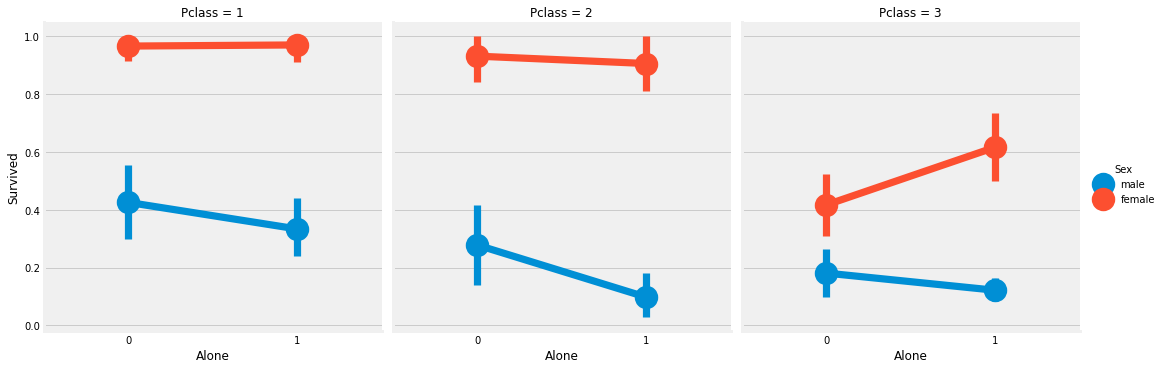

In [42]:
sns.factorplot('Alone', 'Survived', data=data, hue='Sex', col = 'Pclass')
plt.show()

### Fare_Range
- Continuous Feature를 Ordinal값으로 변환시킴. 
- qcut을 이용해서 원하는 구간수만큼 동일한 갯수로 구간을 나눌 것임. 
- 여기서는 5구간으로 데이터수를 균일하게 분할할 것임. 

In [43]:
data['Fare_Range'] = pd.qcut(data['Fare'], 4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [44]:
data['Fare_cat'] = 0
data.loc[data['Fare'] <= 7.91, 'Fare_cat'] = 0
data.loc[(data['Fare'] > 7.91) & (data['Fare']<=14.454), 'Fare_cat'] = 1
data.loc[(data['Fare'] > 14.454) & (data['Fare']<=31), 'Fare_cat'] = 2
data.loc[(data['Fare'] > 31) & (data['Fare']<=513), 'Fare_cat'] = 3

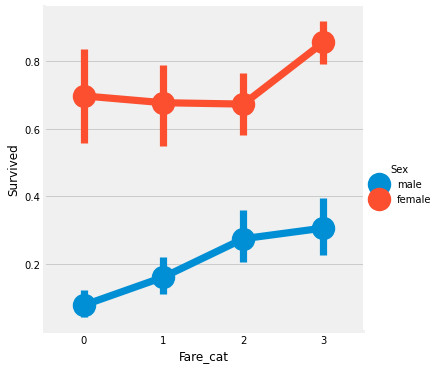

In [45]:
sns.factorplot('Fare_cat', 'Survived', data=data, hue='Sex')
plt.show()

- Fare_cat이 증가할수록 생존확률이 증가함. Sex와 함께 모델링에 중요한 Feature가 될 것임. 

### 문자열 값을 숫자형으로 변환하기 
- 문자열 값은 머신러닝에서 사용할 수 없기 때문에, Sex, Embarked 등의 feature를 숫자값으로 변환해주어야 합니다. 

In [46]:
data['Sex'].replace(['male','female'], [0, 1], inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2], inplace=True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'], [0,1,2,3,4], inplace=True)

### 필요하지 않은 Feature를 제거하기 
Name: Categorical value로 변환
Age: Age_band로 변환.
Ticket: 카테고리화 될 수 없는 무작위 문자열임
Fare: Fare_cat로 변환.
Cabin: NaN 값이 많음
Fare_Range: Fare_cat로 변환
PassengerId: 카테고리화 어려움

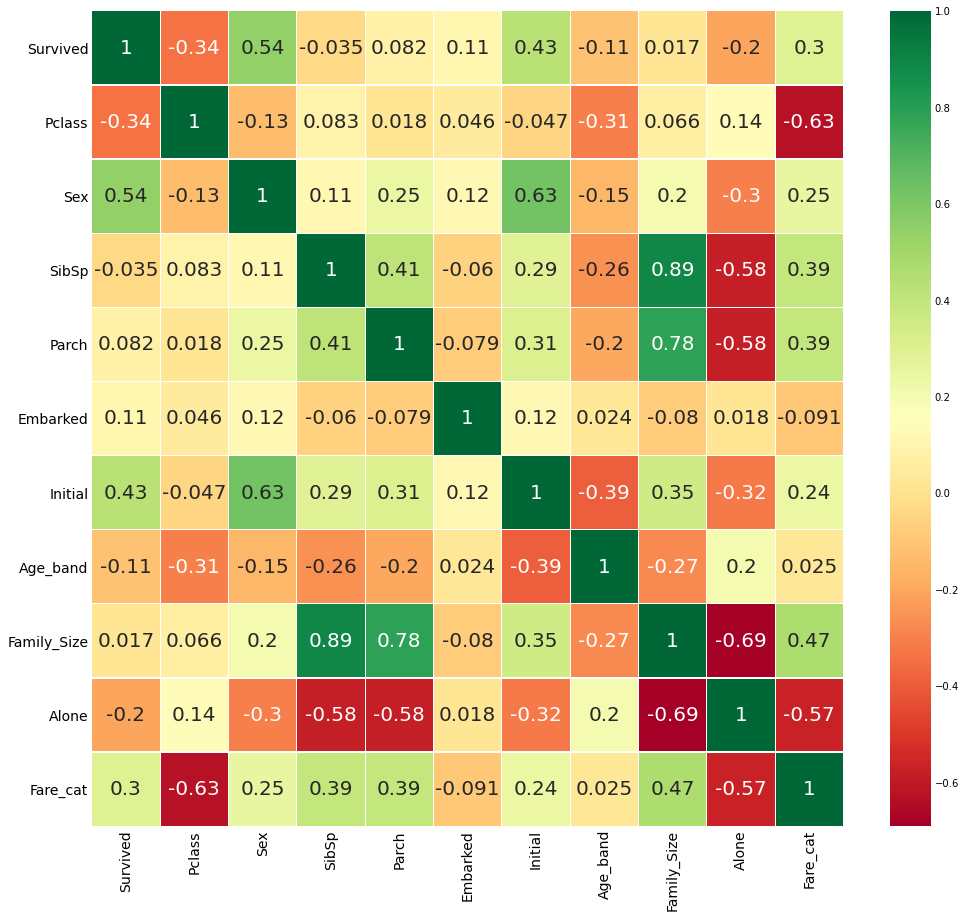

In [47]:
data.drop(['Name', 'Age', 'Ticket', 'Fare', 'Cabin', 'Fare_Range', 'PassengerId'], axis=1, inplace=True)

sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2, annot_kws={'size' : 20})
fig = plt.gcf()
fig.set_size_inches(15, 15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

- Family_size와 SibSp, Parch는 양의 상관관계를 가지고, Alone과 Family_size는 음의 상관관계를 가짐. 

# Part3: Predictive Modeling
### Classification Algorithms

1)Logistic Regression

2)Support Vector Machines(Linear and radial)

3)Random Forest

4)K-Nearest Neighbours

5)Naive Bayes

6)Decision Tree

7)Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

In [49]:
train,test=train_test_split(data,test_size=0.3,random_state=1,stratify=data['Survived'])
train_X=train[train.columns[1:]]
train_Y=train[train.columns[:1]]
test_X=test[test.columns[1:]]
test_Y=test[test.columns[:1]]
X=data[data.columns[1:]]
Y=data['Survived']

### Radial Support Vector Machines(rbf-SVM)

In [50]:
model=svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(train_X,train_Y)
prediction1=model.predict(test_X)
print('Accuracy for rbf SVM is ',metrics.accuracy_score(prediction1,test_Y))

Accuracy for rbf SVM is  0.8208955223880597


### Linear Support Vector Machine(linear-SVM)

In [51]:
model=svm.SVC(kernel='linear',C=0.1,gamma=0.1)
model.fit(train_X,train_Y)
prediction2=model.predict(test_X)
print('Accuracy for linear SVM is',metrics.accuracy_score(prediction2,test_Y))

Accuracy for linear SVM is 0.8171641791044776


### Logistic Regression

In [52]:
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,test_Y))

The accuracy of the Logistic Regression is 0.7985074626865671


### Decision Tree

In [53]:
model = DecisionTreeClassifier()
model.fit(train_X, train_Y)
prediction4 = model.predict(test_X)
print('Accuracy ofthe Decision Tree is ', metrics.accuracy_score(prediction4, test_Y))

Accuracy ofthe Decision Tree is  0.8097014925373134


### K-Nearest Neighbours(KNN)
- KNN 모델의 정확도는 n_neighbors 값을 조절하면 변화. 기본값은 5으로 n_neighbor의 여러 값에 따른 정확도를 체크.

In [54]:
model = KNeighborsClassifier()
model.fit(train_X, train_Y)
prediction5 = model.predict(test_X)
print('Accuracy of the KNN is ', metrics.accuracy_score(prediction5, test_Y))

Accuracy of the KNN is  0.7761194029850746


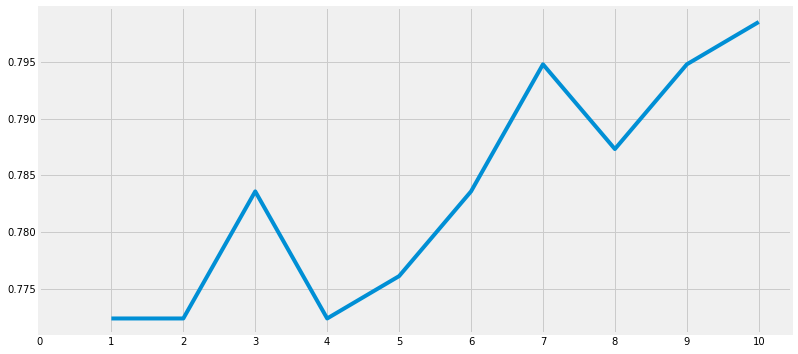

Accuracies for different values of n are :  [0.77238806 0.77238806 0.78358209 0.77238806 0.7761194  0.78358209
 0.79477612 0.78731343 0.79477612 0.79850746] with the max values as 0.7985074626865671


In [55]:
a_index = list(range(1,11))
a = pd.Series()
x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
for i in list(range(1,11)):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(train_X, train_Y)
    prediction = model.predict(test_X)
    a = a.append(pd.Series(metrics.accuracy_score(prediction, test_Y)))
plt.plot(a_index, a)
plt.xticks(x)
fig = plt.gcf()
fig.set_size_inches(12, 6)
plt.show()
print('Accuracies for different values of n are : ', a.values, 'with the max values as', a.values.max())

### Gaussian Naive Bayes

In [56]:
model = GaussianNB()
model.fit(train_X, train_Y)
prediction6 = model.predict(test_X)
print('The accuracy of the Naive Bayes is ', metrics.accuracy_score(prediction6, test_Y))

The accuracy of the Naive Bayes is  0.7723880597014925


### Random Forests

In [57]:
model = RandomForestClassifier(n_estimators=100)
model.fit(train_X, train_Y)
prediction7 = model.predict(test_X)
print('The accuracy of the Random Forests is ', metrics.accuracy_score(prediction7, test_Y))

The accuracy of the Random Forests is  0.8097014925373134


## Cross Validation(교차검증)
- 모델의 정확도는 훈련데이터,테스트데이터에 따라서 달라질 수 있고, 이는 Robustness에 영향을 미침.

In [63]:
from sklearn.model_selection import KFold # K-Fold Cross Validation 
from sklearn.model_selection import cross_val_score # 점수 평가
from sklearn.model_selection import cross_val_predict # 예측

kfold = KFold(n_splits = 10, random_state = 22, shuffle=True) # k = 10 , 데이터셋을  동일 크기의 10개의 서브셋으로 나눕니다.
xyz = []
accuracy = []
std = []
classifiers = ['Linear Svm', 'Radial Svm', 'Logistic Regression', 'KNN', 'Decision Tree',
              'Naive Bayes', 'Random Forest']
models = [svm.SVC(kernel = 'linear'), svm.SVC(kernel = 'rbf'), LogisticRegression(), 
                 KNeighborsClassifier(n_neighbors=9), DecisionTreeClassifier(), GaussianNB(),
                 RandomForestClassifier(n_estimators=100)]
for i in models :
    model = i 
    cv_result = cross_val_score(model, X, Y, cv = kfold, scoring = 'accuracy')
    cv_result = cv_result 
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)

new_models_dataframe2 = pd.DataFrame({'CV Mean' : xyz, 'Std' : std}, index=classifiers)
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.784607,0.057841
Radial Svm,0.828377,0.057096
Logistic Regression,0.799176,0.040154
KNN,0.808140,0.040287
Decision Tree,0.802497,0.044574
Naive Bayes,0.795843,0.054861
Random Forest,0.812597,0.049638
